In [2]:
# Import all of the requried libraries
import numpy as np
import SimpleITK as sitk
import matplotlib.pyplot as plt
import pandas as pd
# import statistics
from statistics import mode,mean

In [3]:
# Read in all of the case files
datapath = '../exploratoryDataAnalysis/'
# Create array to store the 50 images
data = pd.read_csv(datapath + '/labels1.csv')


# images now contains the full dataset, where each index represents the case .mhd file

In [4]:
data.head()

,FileName,Time Recorded,Tool,Overall Task,Tool bounding box
0,AN01-20210104-154854_0000.jpg,0.021,nothing,nothing,"[{'class': 'syringe', 'xmin': 482, 'ymin': 328..."
1,AN01-20210104-154854_0001.jpg,0.279,nothing,nothing,"[{'class': 'syringe', 'xmin': 482, 'ymin': 328..."
2,AN01-20210104-154854_0002.jpg,0.400,nothing,nothing,"[{'class': 'ultrasound', 'xmin': 365, 'ymin': ..."
3,AN01-20210104-154854_0003.jpg,0.819,nothing,nothing,"[{'class': 'ultrasound', 'xmin': 365, 'ymin': ..."
4,AN01-20210104-154854_0004.jpg,0.929,nothing,nothing,"[{'class': 'ultrasound', 'xmin': 365, 'ymin': ..."


#### Goal is to create a histogram containing how long each segment is


Separate by task

In [5]:
Task = []
Task.append('nothing') 
Task.append('Cross-section')
Task.append('insert_needle')
Task.append('anesthetic')
Task.append('insert_guidewire')
Task.append('Long-axis')
Task.append('scalpel')
Task.append('dilator')
Task.append('insert_catheter')
Task.append('remove_guidewire')

dataSeg = []
for i in range(10):
    dataSeg.append(data.loc[data['Overall Task'] == Task[i]])


In [9]:
dataSeg[1].shape
count = []
for i in range(10):
    count.append(dataSeg[i].shape[0])
    
dataSeg[1].tail()

,FileName,Time Recorded,Tool,Overall Task,Tool bounding box
3732,AN01-20210104-154854_3732.jpg,275.096,ultrasound,Cross-section,"[{'class': 'ultrasound', 'xmin': 342, 'ymin': ..."
3733,AN01-20210104-154854_3733.jpg,275.147,ultrasound,Cross-section,"[{'class': 'ultrasound', 'xmin': 342, 'ymin': ..."
3734,AN01-20210104-154854_3734.jpg,275.263,ultrasound,Cross-section,"[{'class': 'ultrasound', 'xmin': 342, 'ymin': ..."
3735,AN01-20210104-154854_3735.jpg,275.315,ultrasound,Cross-section,"[{'class': 'ultrasound', 'xmin': 342, 'ymin': ..."
3736,AN01-20210104-154854_3736.jpg,275.367,ultrasound,Cross-section,"[{'class': 'ultrasound', 'xmin': 342, 'ymin': ..."


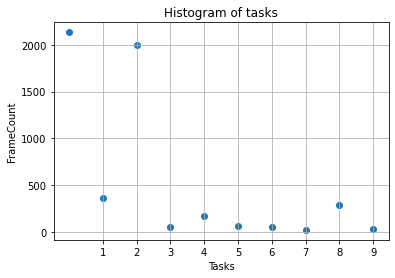

In [44]:
plt.figure()
plt.scatter(np.linspace(0,len(count)-1,len(count)),count)
plt.xlabel('Tasks')
plt.xticks([1,2,3,4,5,6,7,8,9])
plt.ylabel('FrameCount')
plt.title('Histogram of tasks')
plt.grid()

##### Observations
The nothing label and the insert needle tasks are heavily weighted. The difference is of two orders of magnitudes.

